# Taming math and physics using `SymPy`

Tutorial based on the [No bullshit guide](http://minireference.com/) series of textbooks by [Ivan Savov](&#109;&#097;&#105;&#108;&#116;&#111;:&#105;&#118;&#097;&#110;&#046;&#115;&#097;&#118;&#111;&#118;+&#083;&#089;&#077;&#080;&#089;&#084;&#085;&#084;&#064;&#103;&#109;&#097;&#105;&#108;&#046;&#099;&#111;&#109;)

## Abstract

Most people consider math and physics to be scary
beasts from which it is best to keep one's distance. Computers,
however, can help us tame the complexity and tedious arithmetic
manipulations associated with these subjects. Indeed, math and
physics are much more approachable once you have the power of
computers on your side.

This tutorial serves a dual purpose. On one hand, it serves
as a review of the fundamental concepts of mathematics for
computer-literate people. On the other hand, this tutorial serves
to demonstrate to students how a computer algebra system can
help them with their classwork. A word of warning is in order.
Please don't use `SymPy` to avoid the suffering associated with your
homework! Teachers assign homework problems to you because
they want you to learn. Do your homework by hand, but if you
want, you can check your answers using `SymPy`. Better yet, use
`SymPy` to invent extra practice problems for yourself.

## Contents

* [Fundamentals of mathematics](#Fundamentals-of-mathematics)
* [Complex numbers](#Complex-numbers)
* [Calculus](#Calculus)
* [Vectors](#Vectors)
* [Mechanics](#Mechanics)
* [Linear algebra](#Linear-algebra)

## Introduction

You can use a computer algebra system (CAS) to compute complicated
math expressions, solve equations, perform calculus procedures,
and simulate physics systems.

All computer algebra systems offer essentially the same functionality,
so it doesn't matter which system you use: there are free
systems like `SymPy`, `Magma`, or `Octave`, and commercial systems like
`Maple`, `MATLAB`, and `Mathematica`. This tutorial is an introduction to
`SymPy`, which is a *symbolic* computer algebra system written in the
programming language `Python`. In a symbolic CAS, numbers and
operations are represented symbolically, so the answers obtained are
exact. For example, the number &radic;2 is represented in `SymPy` as the
object `Pow(2,1/2)`, whereas in numerical computer algebra systems
like `Octave`, the number &radic;2 is represented as the approximation
1.41421356237310 (a `float`). For most purposes the approximation
is okay, but sometimes approximations can lead to problems:
`float(sqrt(2))*float(sqrt(2))` = 2.00000000000000044 &ne; 2. Because
`SymPy` uses exact representations, you'll never run into such
problems: `Pow(2,1/2)*Pow(2,1/2)` = 2.

This tutorial is organized as follows. We'll begin by introducing the
`SymPy` basics and the bread-and-butter functions used for manipulating
expressions and solving equations. Afterward, we'll discuss the
`SymPy` functions that implement calculus operations like differentiation
and integration. We'll also introduce the functions used to deal with
vectors and complex numbers. Later we'll see how to use vectors and
integrals to understand Newtonian mechanics. In the last section,
we'll introduce the linear algebra functions available in `SymPy`.

This tutorial presents many explanations as blocks of code. Be sure
to try the code examples on your own by typing the commands into
`SymPy`. It's always important to verify for yourself!

## Using SymPy

The easiest way to use `SymPy`, provided you're connected to the
Internet, is to visit http://live.sympy.org. You'll be presented with
an interactive prompt into which you can enter your commands&mdash;right
in your browser.

If you want to use `SymPy` on your own computer, you must install
`Python` and the python package `sympy`. You can then open a command
prompt and start a `SymPy` session using:

```
you@host$ python
Python X.Y.Z
[GCC a.b.c (Build Info)] on platform
Type "help", "copyright", or "license" for more information.
>>> from sympy import *
>>>
```

The `>>>` prompt indicates you're in the Python shell which accepts
Python commands. The command `from sympy import *` imports all
the `SymPy` functions into the current namespace. All `SymPy` functions
are now available to you. To exit the python shell press `CTRL+D`.

I highly recommend you also install `ipython`, which is an improved
interactive python shell. If you have `ipython` and `SymPy` installed,
you can start an `ipython` shell with `SymPy` pre-imported using the
command `isympy`. For an even better experience, you can try `ipython notebook`,
which is a web frontend for the `ipython` shell.

You can start your session the same way as `isympy` do, by running following commands, which will be detaily described latter.

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6 (Python 3.4.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


## Fundamentals of mathematics

Let's begin by learning about the basic `SymPy` objects and the
operations we can carry out on them. We'll learn the `SymPy` equivalents
of many math verbs like &ldquo;to solve&rdquo; (an equation), &ldquo;to expand&rdquo; (an
expression), &ldquo;to factor&rdquo; (a polynomial).

### Numbers

In `Python`, there are two types of number objects: `int`s and `float`s.

In [2]:
3         # an int

In [3]:
3.0       # a float

Integer objects in `Python` are a faithful representation of the set of
integers $\mathbb{Z}=\{\ldots,-2,-1,0,1,2,\ldots\}$. Floating point numbers are
approximate representations of the reals $\mathbb{R}$. Regardless of its absolute
size, a floating point number is only accurate to 16 decimals.

Special care is required when specifying rational numbers, because
integer division might not produce the answer you want. In other
words, Python will not automatically convert the answer to a floating
point number, but instead round the answer to the closest integer:

In [4]:
1/7       # int/int gives int

To avoid this problem, you can force `float` division by using the
number `1.0` instead of `1`:

In [5]:
1.0/7     # float/int gives float

This result is better, but it's still only an approximation of the exact
number $\frac{1}{7} \in \mathbb{Q}$, since a `float` has 16 decimals while the decimal
expansion of $\frac{1}{7}$ is infinitely long. To obtain an *exact* representation
of $\frac{1}{7}$ you need to create a `SymPy` expression. You can sympify any
expression using the shortcut function `S()`:

In [6]:
S('1/7')  # = Rational(1,7)

Note the input to `S()` is specified as a text string delimited by quotes.
We could have achieved the same result using `S('1')/7` since a `SymPy`
object divided by an `int` is a `SymPy` object.

Except for the tricky `Python` division operator, other math operators
like addition `+`, subtraction `-`, and multiplication `*` work as you would
expect. The syntax `**` is used in `Python` to denote exponentiation:

In [7]:
2**10     # same as S('2^10')

When solving math problems, it's best to work with `SymPy` objects,
and wait to compute the numeric answer in the end. To obtain a
numeric approximation of a `SymPy` object as a `float`, call its `.evalf()`
method:

In [8]:
pi

In [9]:
pi.evalf()

The method `.n()` is equivalent to `.evalf()`. The global `SymPy`
function `N()` can also be used to to compute numerical values. You can
easily change the number of digits of precision of the approximation.
Enter `pi.n(400)` to obtain an approximation of $\pi$ to 400 decimals.

### Symbols

Python is a civilized language so there's no need to define variables
before assigning values to them. When you write `a = 3`, you define a
new name `a` and set it to the value `3`. You can now use the name `a`
in subsequent calculations.

Most interesting `SymPy` calculations require us to define `symbols`,
which are the `SymPy` objects for representing variables and unknowns.
For your convenience, when [live.sympy.org](http://live.sympy.org) starts, it runs the
following commands automatically:

In [10]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

The first statement instructs python to convert `1/7` to `1.0/7` when
dividing, potentially saving you from any int division confusion. The
second statement imports all the `SymPy` functions. The remaining
statements define some generic symbols `x`, `y`, `z`, and `t`, and several
other symbols with special properties.

Note the difference between the following two statements:

In [11]:
x + 2            # an Add expression

In [12]:
p + 2

NameError: name 'p' is not defined

The name `x` is defined as a symbol, so `SymPy` knows that `x + 2` is an
expression; but the variable `p` is not defined, so `SymPy` doesn't know
what to make of `p + 2`. To use `p` in expressions, you must first define
it as a symbol:

In [13]:
p = Symbol('p')  # the same as p = symbols('p')
p + 2            # = Add(Symbol('p'), Integer(2))

You can define a sequence of variables using the following notation:

In [14]:
a0, a1, a2, a3 = symbols('a0:4')

You can use any name you want for a variable, but it's best if you
avoid the letters `Q,C,O,S,I,N` and `E` because they have special uses
in `SymPy`: `I` is the unit imaginary number $i \equiv \sqrt(-1)$, `E` is the base of
the natural logarithm, `S()` is the sympify function, `N()` is used to
obtain numeric approximations, and `O` is used for big-O notation.

The underscore symbol `_` is a special variable that contains the result
of the last printed value. The variable `_` is analogous to the `ans` button
on certain calculators, and is useful in multi-step calculations:

In [15]:
3+3

In [16]:
_*2

### Expresions

You define `SymPy` expressions by combining symbols with basic math
operations and other functions:

In [17]:
expr = 2*x + 3*x - sin(x) - 3*x + 42
simplify(expr)

The function `simplify` can be used on any expression to simplify
it. The examples below illustrate other useful `SymPy` functions that
correspond to common mathematical operations on expressions:

In [18]:
factor( x**2-2*x-8 )

In [19]:
expand( (x-4)*(x+2) )

In [20]:
a, b = symbols('a b')
collect(x**2 + x*b + a*x + a*b, x)  # collect terms for diff. pows of x

To substitute a given value into an expression, call the `.subs()`
method, passing in a python dictionary object `{ key:val, ... }`
with the symbol&ndash;value substitutions you want to make:

In [21]:
expr = sin(x) + cos(y)
expr

In [22]:
expr.subs({x:1, y:2})

In [23]:
expr.subs({x:1, y:2}).n()

Note how we used `.n()` to obtain the expression's numeric value.

### Solving equations

The function `solve` is the main workhorse in `SymPy`. This incredibly
powerful function knows how to solve all kinds of equations. In fact
`solve` can solve pretty much any equation! When high school students
learn about this function, they get really angry&mdash;why did they spend
five years of their life learning to solve various equations by hand,
when all along there was this `solve` thing that could do all the math
for them? Don't worry, learning math is never a waste of time.

The function `solve` takes two arguments. Use `solve(expr,var)` to
solve the equation `expr==0` for the variable `var`. You can rewrite any
equation in the form `expr==0` by moving all the terms to one side
of the equation; the solutions to $A(x) = B(x)$ are the same as the
solutions to $A(x) - B(x) = 0$.

For example, to solve the quadratic equation $x^2 + 2x - 8 = 0$, use

In [24]:
solve( x**2 + 2*x - 8, x)

In this case the equation has two solutions so `solve` returns a list.
Check that $x = 2$ and $x = -4$ satisfy the equation $x^2 + 2x - 8 = 0$.

The best part about `solve` and `SymPy` is that you can obtain symbolic
answers when solving equations. Instead of solving one specific
quadratic equation, we can solve all possible equations of the form
$ax^2 + bx + c = 0$ using the following steps:

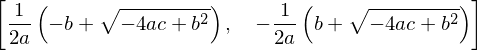

In [25]:
a, b, c = symbols('a b c')
solve( a*x**2 + b*x + c, x)

In this case `solve` calculated the solution in terms of the symbols
`a`, `b`, and `c`. You should be able to recognize the expressions in the
solution&mdash;it's the quadratic formula $x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$.

To solve a specific equation like $x^2 + 2x - 8 = 0$, we can substitute
the coefficients $a = 1$, $b = 2$, and $c = -8$ into the general solution to
obtain the same result:

In [26]:
gen_sol = solve( a*x**2 + b*x + c, x)
[ gen_sol[0].subs({'a':1,'b':2,'c':-8}),
  gen_sol[1].subs({'a':1,'b':2,'c':-8}) ]

To solve a *system of equations*, you can feed `solve` with the list of
equations as the first argument, and specify the list of unknowns you
want to solve for as the second argument. For example, to solve for $x$
and $y$ in the system of equations $x + y = 3$ and $3x - 2y = 0$, use

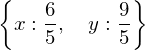

In [27]:
solve([x + y - 3, 3*x - 2*y], [x, y])

The function `solve` is like a Swiss Army knife you can use to solve
all kind of problems. Suppose you want to *complete the square* in the
expression $x^2 - 4x + 7$, that is, you want to find constants $h$ and $k$
such that $x^2 -4x + 7 = (x-h)^2 + k$. There is no special &ldquo;complete the
square&rdquo; function in `SymPy`, but you can call solve on the equation
$(x - h)^2 + k - (x^2 - 4x + 7) = 0$ to find the unknowns $h$ and $k$:

In [28]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )

In [29]:
((x-2)**2+3).expand()  # so h = 2 and k = 3, verify...

Learn the basic `SymPy` commands and you'll never need to suffer
another tedious arithmetic calculation painstakingly performed by
hand again!

### Rational functions

By default, `SymPy` will not combine or split rational expressions.
You need to use `together` to symbolically calculate the addition of
fractions:

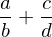

In [30]:
a, b, c, d = symbols('a b c d')
a/b + c/d

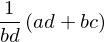

In [31]:
together(a/b + c/d)

Alternately, if you have a rational expression and want to divide the
numerator by the denominator, use the `apart` function:

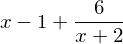

In [32]:
apart( (x**2+x+4)/(x+2) )

### Exponentials and logarithms

Euler's constant $e = 2.71828\dots$ is defined one of several ways,

$$
e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n
  \equiv \lim_{\epsilon\to 0}(1+\epsilon)^{1/\epsilon}
  \equiv \sum_{n=0}^{\infty}\frac{1}{n!},
$$

and is denoted `E` in `SymPy`. Using `exp(x)` is equivalent to `E**x`.

The functions `log` and `ln` both compute the logarithm base $e$:

In [33]:
log(E**3)  # same as ln(E**3)

By default, `SymPy` assumes the inputs to functions like `exp` and `log` are
complex numbers, so it will not expand certain logarithmic expressions.
However, indicating to `SymPy` that the inputs are positive real numbers
will make the expansions work:

In [34]:
x, y = symbols('x y')
log(x*y).expand()

In [35]:
a, b = symbols('a b', positive=True)
log(a*b).expand()

### Polynomials

Let's define a polynomial $P$ with roots at $x = 1$, $x = 2$, and $x = 3$:

In [36]:
P = (x-1)*(x-2)*(x-3)
P

To see the expanded version of the polynomial, call its `expand` method:

In [37]:
P.expand()

When the polynomial is expressed in it's expanded form $P(x) =
x^3 - 6x^2 + 11x - 6$, we can't immediately identify its roots. This is
why the factored form $P(x) = (x - 1)(x - 2)(x - 3)$ is preferable. To
factor a polynomial, call its `factor` method or simplify it:

In [38]:
P.factor()

In [39]:
P.simplify()

Recall that the roots of the polynomial $P(x)$ are defined as the
solutions to the equation $P(x) = 0$. We can use the `solve` function
to find the roots of the polynomial:

In [40]:
roots = solve(P,x)
roots

In [41]:
# let's check if P equals (x-1)(x-2)(x-3)
simplify( P - (x-roots[0])*(x-roots[1])*(x-roots[2]) )

### Equality checking

In the last example, we used the `simplify` function to check whether
two expressions were equal. This way of checking equality works
because $P = Q$ if and only if $P - Q = 0$. This is the best way to
check if two expressions are equal in `SymPy` because it attempts all
possible simplifications when comparing the expressions. Below is
a list of other ways to check whether two quantities are equal with
example cases where they fail:

In [42]:
p = (x-5)*(x+5)
q = x**2 - 25

In [43]:
p == q                      # fail

False

In [44]:
p - q == 0                  # fail

False

In [45]:
simplify(p - q) == 0

True

In [46]:
sin(x)**2 + cos(x)**2 == 1  # fail

False

In [47]:
simplify( sin(x)**2 + cos(x)**2 - 1) == 0

True

### Trigonometry

The trigonometric functions `sin` and `cos` take inputs in radians:

In [48]:
sin(pi/6)

In [49]:
cos(pi/6)

For angles in degrees, you need a conversion factor of $\frac{\pi}{180}$[rad/$^\circ$]:

In [50]:
sin(30*pi/180)  # 30 deg = pi/6 rads

The inverse trigonometric functions $\sin^{-1}(x) \equiv \arcsin(x)$ and
$\cos^{-1}(x) \equiv \arccos(x)$ are used as follows:

In [51]:
asin(1/2)

In [52]:
acos(sqrt(3)/2)

Recall that $\tan(x) \equiv \frac{\sin(x)}{\cos(x)}$. The inverse function of $\tan(x)$ is $\tan^{-1}(x) \equiv \arctan(x) \equiv$ `atan(x)`

In [53]:
tan(pi/6)

In [54]:
atan( 1/sqrt(3) )

The function `acos` returns angles in the range $[0, \pi]$, while `asin` and
`atan` return angles in the range $[-\frac{\pi}{2},\frac{\pi}{2}]$.

Here are some trigonometric identities that `SymPy` knows:

In [55]:
sin(x) == cos(x - pi/2)

True

In [56]:
simplify( sin(x)*cos(y)+cos(x)*sin(y) )

In [57]:
e = 2*sin(x)**2 + 2*cos(x)**2
trigsimp(e)

In [58]:
trigsimp(log(e))

In [59]:
trigsimp(log(e), deep=True)

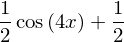

In [60]:
simplify(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

The function `trigsimp` does essentially the same job as `simplify`.

If instead of simplifying you want to expand a trig expression, you
should use `expand_trig`, because the default `expand` won't touch trig
functions:

In [61]:
expand(sin(2*x))       # = (sin(2*x)).expand()

In [62]:
expand_trig(sin(2*x))  # = (sin(2*x)).expand(trig=True)

### Hyperbolic trigonometric functions

The hyperbolic sine and cosine in `SymPy` are denoted `sinh` and `cosh`
respectively and `SymPy` is smart enough to recognize them when
simplifying expressions:

In [63]:
simplify( (exp(x)+exp(-x))/2 )

In [64]:
simplify( (exp(x)-exp(-x))/2 )

Recall that $x = \cosh(\mu)$ and $y = \sinh(\mu)$ are defined as $x$ and $y$
coordinates of a point on the the hyperbola with equation $x^2 - y^2 = 1$
and therefore satisfy the identity $\cosh^2 x - \sinh^2 x = 1$:

In [65]:
simplify( cosh(x)**2 - sinh(x)**2 )

## Complex numbers

Ever since Newton, the word &ldquo;number&rdquo; has been used to refer to one
of the following types of math objects: the naturals $\mathbb{N}$, the integers
$\mathbb{Z}$, the rationals $\mathbb{Q}$, and the real numbers $\mathbb{R}$. Each set of numbers is
associated with a different class of equations. The natural numbers
$\mathbb{N}$ appear as solutions of the equation $m + n = x$, where $m$ and $n$ are
natural numbers (denoted $m, n \in \mathbb{N}$). The integers $\mathbb{Z}$ are the solutions
to equations of the form $x + m = n$, where $m, n \in \mathbb{N}$. The rational
numbers $\mathbb{Q}$ are necessary to solve for $x$ in $mx = n$, with $m, n \in \mathbb{Z}$.
The solutions to $x^2 = 2$ are irrational (so $\not\in \mathbb{Q}$) so we need an even
larger set that contains *all* possible numbers: real set of numbers $\mathbb{R}$.
A pattern emerges where more complicated equations require the
invention of new types of numbers.

Consider the quadratic equation $x^2 = -1$. There are no real solutions
to this equation, but we can define an imaginary number $i = \sqrt{-1}$
(denoted `I` in `SymPy`) that satisfies this equation:

In [66]:
I*I

In [67]:
solve( x**2 + 1 , x)

The solutions are $x = i$ and $x = -i$, and indeed we can verify that
$i^2 + 1 = 0$ and $(-i)^2 + 1 = 0$ since $i^2 = -1$.

The complex numbers $\mathbb{C}$ are defined as $\{ a+bi \,|\, a,b \in \mathbb{R} \}$. Complex numbers
contain a real part and an imaginary part:

In [68]:
z = 4 + 3*I
z

In [69]:
re(z)

In [70]:
im(z)

The *polar* representation of a complex number is $z\!\equiv\!|z|\angle\theta\!\equiv \!|z|e^{i\theta}$.
For a complex number $z=a+bi$, 
the quantity $|z|=\sqrt{a^2+b^2}$ is known as the absolute value of $z$,
and $\theta$ is its *phase* or its *argument*:

In [71]:
Abs(z)

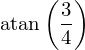

In [72]:
arg(z)

The complex conjugate of $z = a + bi$ is the number $\bar{z} = a - bi$:

In [73]:
conjugate( z )

Complex conjugation is important for computing the absolute value
of $z$ $\left(|z|\equiv\sqrt{z\bar{z}}\right)$ and for division by $z$ $\left(\frac{1}{z}\equiv\frac{\bar{z}}{|z|^2}\right)$.

### Euler's formula

[Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula) shows an important relation between the exponential
function $e^x$ and the trigonometric functions $sin(x)$ and $cos(x)$:

$$e^{ix} = \cos x + i \sin x.$$

To obtain this result in `SymPy`, you must specify that the number $x$ is
real and also tell `expand` that you're interested in complex expansions:

In [74]:
x = symbols('x', real=True)
exp(I*x).expand(complex=True)

In [75]:
re( exp(I*x) )

In [76]:
im( exp(I*x) )

Basically, $\cos(x)$ is the real part of $e^{ix}$, and $\sin(x)$ is the imaginary
part of $e^{ix}$. Whaaat? I know it's weird, but weird things are bound
to happen when you input imaginary numbers to functions.

Euler's formula is often used to rewrite the functions `sin` and `cos` in
terms of complex exponentials. For example,

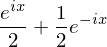

In [77]:
(cos(x)).rewrite(exp)

Compare this expression with the definition of hyperbolic cosine.

## Calculus

Calculus is the study of the properties of functions. The operations of
calculus are used to describe the limit behaviour of functions, calculate
their rates of change, and calculate the areas under their graphs. In
this section we'll learn about the `SymPy` functions for calculating
limits, derivatives, integrals, and summations.

### Infinity

The infinity symbol is denoted `oo` (two lowercase `o`s) in `SymPy`. Infinity
is not a number but a process: the process of counting forever. Thus,
$\infty + 1 = \infty$, $\infty$ is greater than any finite number, and $1/\infty$ is an
infinitely small number. `Sympy` knows how to correctly treat infinity
in expressions:

In [78]:
oo+1

In [79]:
5000 < oo

In [80]:
1/oo

### Limits

We use limits to describe, with mathematical precision, infinitely large
quantities, infinitely small quantities, and procedures with infinitely
many steps.

The number $e$ is defined as the limit $e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n$:

In [81]:
limit( (1+1/n)**n, n, oo)

This limit expression describes the annual growth rate of a loan with
a nominal interest rate of 100% and infinitely frequent compounding.
Borrow \$1000 in such a scheme, and you'll owe $2718.28 after one year.

Limits are also useful to describe the behaviour of functions. Consider
the function $f(x) = \frac{1}{x}$. The `limit` command shows us what happens
to $f(x)$ near $x = 0$ and as $x$ goes to infinity:

In [82]:
limit( 1/x, x, 0, dir="+")

In [83]:
limit( 1/x, x, 0, dir="-")

In [84]:
limit( 1/x, x, oo)

As $x$ becomes larger and larger, the fraction $\frac{1}{x}$ becomes smaller
and smaller. In the limit where $x$ goes to infinity, $\frac{1}{x}$ approaches
zero: $\lim_{x\to\infty}\frac{1}{x} = 0$. On the other hand, when $x$ takes on smaller
and smaller positive values, the expression $\frac{1}{x}$ becomes infinite:
$\lim_{x\to0^+}\frac{1}{x} = \infty$. When $x$ approaches 0 from the left, we have
$\lim_{x\to0^-}\frac{1}{x}=-\infty$. If these calculations are not clear to you, study
the graph of $f(x) = \frac{1}{x}$.

Here are some other examples of limits:

In [85]:
limit(sin(x)/x, x, 0)

In [86]:
limit(sin(x)**2/x, x, 0)

In [87]:
limit(exp(x)/x**100,x,oo)  # which is bigger e^x or x^100 ?
                           # exp f >> all poly f for big x

Limits are used to define the derivative and the integral operations.

### Derivatives

The derivative function, denoted $f'(x)$, $\frac{d}{dx}f(x)$, $\frac{df}{dx}$, or $\frac{dy}{dx}$, 
describes the *rate of change* of the function $f(x)$.
The `SymPy` function `diff` computes the derivative of any expression:

In [88]:
diff(x**3, x)

The differentiation operation knows about the product rule $[f(x)g(x)]^\prime=f^\prime(x)g(x)+f(x)g^\prime(x)$, 
the chain rule $f(g(x))' = f'(g(x))g'(x)$, 
and the quotient rule $\left[\frac{f(x)}{g(x)}\right]^\prime = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$:

In [89]:
diff( x**2*sin(x), x )

In [90]:
diff( sin(x**2), x )

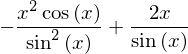

In [91]:
diff( x**2/sin(x), x )

The second derivative of a function `f` is `diff(f,x,2)`:

In [92]:
diff(x**3, x, 2)   # same as diff(diff(x**3, x), x)

The exponential function $f(x)=e^x$ is special because it is equal to its derivative:

In [93]:
diff( exp(x), x )  # same as diff( E**x, x  )

A differential equation is an equation that relates some unknown function $f(x)$ to its derivative. 
An example of a differential equation is $f'(x)=f(x)$.
What is the function $f(x)$ which is equal to its derivative?
You can either try to guess what $f(x)$ is or use the `dsolve` function:

In [94]:
x = symbols('x')
f = symbols('f', cls=Function)  # can now use f(x)
dsolve( f(x) - diff(f(x),x), f(x) )

We'll discuss `dsolve` again in the section on mechanics.

### Tangent lines

The *tangent line* to the function $f(x)$ at $x=x_0$ is 
the line that passes through the point $(x_0, f(x_0))$ and has 
the same slope as the function at that point.
The tangent line to the function $f(x)$ at the point $x=x_0$ is described by the equation

$$
   T_1(x) =  f(x_0) \ + \  f'(x_0)(x-x_0).
$$

What is the equation of the tangent line to $f(x)=\frac{1}{2}x^2$ at $x_0=1$?

In [95]:
f = S('1/2')*x**2
f

In [96]:
df = diff(f,x)
df

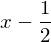

In [97]:
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
T_1

The tangent line $T_1(x)$ has the same value and slope as the function $f(x)$ at $x=1$:

In [98]:
T_1.subs({x:1}) == f.subs({x:1})

True

In [99]:
diff(T_1,x).subs({x:1}) == diff(f,x).subs({x:1})

True

### Optimization

Optimization is about choosing an input for a function $f(x)$ that results in the best value for $f(x)$.
The best value usually means the *maximum* value 
(if the function represents something desirable like profits) 
or the *minimum* value 
(if the function represents something undesirable like costs).

The derivative $f'(x)$ encodes the information about the *slope* of $f(x)$.
Positive slope $f'(x)>0$ means $f(x)$ is increasing,
negative slope $f'(x)<0$ means $f(x)$ is decreasing, 
and zero slope $f'(x)=0$ means the graph of the function is horizontal.
The *critical points* of a function $f(x)$ are the solutions to the equation $f'(x)=0$.
Each critical point is a candidate to be either a maximum or a minimum of the function.

The second derivative $f^{\prime\prime}(x)$ encodes the information about the *curvature* of $f(x)$.
Positive curvature means the function looks like $x^2$,
negative curvature means the function looks like $-x^2$.

Let's find the critical points of the function $f(x)=x^3-2x^2+x$ 
and use the information from its second derivative 
to find the maximum of the function 
on the interval $x \in [0,1]$.

In [100]:
x = Symbol('x')
f = x**3-2*x**2+x
diff(f, x)

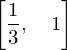

In [101]:
sols = solve( diff(f,x),  x)
sols

In [102]:
diff(diff(f,x), x).subs( {x:sols[0]} )

In [103]:
diff(diff(f,x), x).subs( {x:sols[1]} )

[It will help to look at the graph of this function.](https://www.google.com/#safe=off&q=plot+x**3-2*x**2%2Bx)
The point $x=\frac{1}{3}$ is a local maximum because it is a critical point of $f(x)$
where the curvature is negative, meaning $f(x)$ looks like the peak of a mountain at $x=\frac{1}{3}$.
The maximum value of $f(x)$ on the interval $x\in [0,1]$ is $f\!\left(\frac{1}{3}\right)=\frac{4}{27}$.
The point $x=1$ is a local minimum because it is a critical point
with positive curvature, meaning $f(x)$ looks like the bottom of a valley at $x=1$.

### Integrals

The *integral* of $f(x)$ corresponds to the computation of the area under the graph of $f(x)$.
The area under $f(x)$ between the points $x=a$ and $x=b$ is denoted as follows:

$$
 A(a,b) = \int_a^b f(x) \: dx.
$$

The *integral function* $F$ corresponds to the area calculation as a function 
of the upper limit of integration:

$$
  F(c) \equiv \int_0^c \! f(x)\:dx\,.
$$

The area under $f(x)$ between $x=a$ and $x=b$ is obtained by 
calculating the *change* in the integral function:

$$
   A(a,b) = \int_a^b \! f(x)\:dx  =  F(b)-F(a).
$$

In `SymPy` we use `integrate(f, x)` to obtain the integral function $F(x)$ of any function $f(x)$:
$F(x) = \int_0^x f(u)\,du$.

In [104]:
integrate(x**3, x)

In [105]:
integrate(sin(x), x)

In [106]:
integrate(ln(x), x)

This is known as an *indefinite integral* since the limits of integration are not defined. 

In contrast, 
a *definite integral* computes the area under $f(x)$ between $x=a$ and $x=b$.
Use `integrate(f, (x,a,b))` to compute the definite integrals of the form $A(a,b)=\int_a^b f(x) \, dx$:

In [107]:
integrate(x**3, (x,0,1))  # the area under x^3 from x=0 to x=1

We can obtain the same area by first calculating the indefinite integral $F(c)=\int_0^c \!f(x)\,dx$,
then using $A(a,b) = F(x)\big\vert_a^b \equiv F(b) - F(a)$:

In [108]:
F = integrate(x**3, x)
F.subs({x:1}) - F.subs({x:0})

Integrals correspond to *signed* area calculations:

In [109]:
integrate(sin(x), (x,0,pi))

In [110]:
integrate(sin(x), (x,pi,2*pi))

In [111]:
integrate(sin(x), (x,0,2*pi))

During the first half of its $2\pi$-cycle,
the graph of $\sin(x)$ is above the $x$-axis, so it has a positive contribution to the area under the curve.
During the second half of its cycle (from $x=\pi$ to $x=2\pi$),
$\sin(x)$ is below the $x$-axis, so it contributes negative area.
Draw a graph of $\sin(x)$ to see what is going on.

### Fundamental theorem of calculus

The integral is the &ldquo;inverse operation&rdquo; of the derivative.
If you perform the integral operation followed by the derivative operation on some function, 
you'll obtain the same function:

$$
  \left(\frac{d}{dx} \circ \int dx \right) f(x) \equiv \frac{d}{dx} \int_c^x f(u)\:du = f(x).
$$

In [112]:
f = x**2
F = integrate(f, x)
F

In [113]:
diff(F,x)

Alternately, if you compute the derivative of a function followed by the integral,
you will obtain the original function $f(x)$ (up to a constant):

$$
  \left( \int dx \circ \frac{d}{dx}\right) f(x) \equiv \int_c^x f'(u)\;du = f(x) + C.
$$

In [114]:
f = x**2
df = diff(f,x)
df

In [115]:
integrate(df, x)

The fundamental theorem of calculus is important because it tells us how to solve differential equations.
If we have to solve for $f(x)$ in the differential equation $\frac{d}{dx}f(x) = g(x)$,
we can take the integral on both sides of the equation to obtain the answer $f(x) = \int g(x)\,dx + C$.

### Sequences

Sequences are functions that take whole numbers as inputs.
Instead of continuous inputs $x\in \mathbb{R}$,
sequences take natural numbers $n\in\mathbb{N}$ as inputs.
We denote sequences as $a_n$ instead of the usual function notation $a(n)$.

We define a sequence by specifying an expression for its $n^\mathrm{th}$ term:

In [116]:
a_n = 1/n
b_n = 1/factorial(n)

Substitute the desired value of $n$ to see the value of the $n^\mathrm{th}$ term:

In [117]:
a_n.subs({n:5})

The `Python` list comprehension syntax `[item for item in list]`
can be used to print the sequence values for some range of indices:

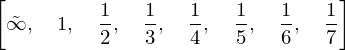

In [118]:
[ a_n.subs({n:i}) for i in range(0,8) ]

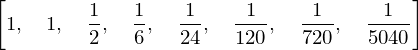

In [119]:
[ b_n.subs({n:i}) for i in range(0,8) ]

Observe that $a_n$ is not properly defined for $n=0$ since $\frac{1}{0}$ is a division-by-zero error.
To be precise, we should say $a_n$'s domain is the positive naturals $a_n:\mathbb{N}^+ \to \mathbb{R}$.
Observe how quickly the `factorial` function $n!=1\cdot2\cdot3\cdots(n-1)\cdot n$ grows:
$7!= 5040$, $10!=3628800$, $20! > 10^{18}$.

We're often interested in calculating the limits of sequences as $n\to \infty$.
What happens to the terms in the sequence when $n$ becomes large?

In [120]:
limit(a_n, n, oo)

In [121]:
limit(b_n, n, oo)

Both $a_n=\frac{1}{n}$ and $b_n = \frac{1}{n!}$ *converge* to $0$ as $n\to\infty$. 

Many important math quantities are defined as limit expressions.
An interesting example to consider is the number $\pi$, 
which is defined as the area of a circle of radius $1$.
We can approximate the area of the unit circle by drawing a many-sided regular polygon around the circle.
Splitting the $n$-sided regular polygon into identical triangular splices,
we can obtain a formula for its area $A_n$.
In the limit as $n\to \infty$, 
the $n$-sided-polygon approximation to the area of the unit-circle becomes exact:

In [122]:
A_n = n*tan(2*pi/(2*n))
limit(A_n, n, oo)

### Series

Suppose we're given a sequence $a_n$ and we want to compute the sum of all the values in this sequence $\sum_{n}^\infty a_n$.
Series are sums of sequences.
Summing the values of a sequence $a_n:\mathbb{N}\to \mathbb{R}$
is analogous to taking the integral of a function $f:\mathbb{R}\to \mathbb{R}$.

To work with series in `SymPy`,
use the `summation` function whose syntax is analogous to the `integrate` function: 

In [123]:
a_n = 1/n
summation(a_n, [n, 1, oo])

In [124]:
b_n = 1/factorial(n)
summation(b_n, [n, 0, oo])

We say the series $\sum a_n$ *diverges* to infinity (or *is divergent*) while the series $\sum b_n$ converges (or *is convergent*).
As we sum together more and more terms of the sequence $b_n$, the total becomes closer and closer to some finite number.
In this case, the infinite sum $\sum_{n=0}^\infty \frac{1}{n!}$ converges to the number $e=2.71828\ldots$.


The `summation` command is useful because it allows us to compute `infinite` sums,
but for most practical applications we don't need to take an infinite number of terms in a series to obtain a good approximation. 
This is why series are so neat: they represent a great way to obtain approximations.

Using standard `Python` commands,  
we can obtain an approximation to $e$ that is accurate to six decimals by summing 10 terms in the series:

In [125]:
import math
def b_nf(n): 
    return 1.0/math.factorial(n)
sum( [b_nf(n) for n in range(0,10)] )

In [126]:
E.evalf()  # true value

### Taylor series

Wait, there's more! 
Not only can we use series to approximate numbers,
we can also use them to approximate functions.

A *power series* is a series whose terms contain different powers of the variable $x$.
The $n^\mathrm{th}$ term in a power series is a function of both the sequence index $n$ and the input variable $x$.

For example, the power series of the function $\exp(x)=e^x$ is 

$$
 \exp(x) \equiv  1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \cdots         
  =       \sum_{n=0}^\infty \frac{x^n}{n!}.
$$

This is, IMHO, one of the most important ideas in calculus:
you can compute the value of $\exp(5)$ by taking the infinite sum of the terms in the power series with $x=5$:

In [127]:
exp_xn = x**n/factorial(n)
summation( exp_xn.subs({x:5}), [n, 0, oo] ).evalf()

In [128]:
exp(5).evalf()  # the true value

Note that `SymPy` is actually smart enough to recognize that the infinite series
you're computing corresponds to the closed-form expression $e^5$:

In [129]:
summation( exp_xn.subs({x:5}), [n, 0, oo])

Taking as few as 35 terms in the series is sufficient to obtain an approximation to $e$
that is accurate to 16 decimals:

In [130]:
import math  # redo using only python 
def exp_xnf(x,n): 
    return x**n/math.factorial(n)
sum( [exp_xnf(5.0,i) for i in range(0,35)] )

The coefficients in the power series of a function (also known as the *Taylor series*) 
The formula for the $n^\mathrm{th}$ term in the Taylor series of $f(x)$ expanded at $x=c$ is $a_n(x) = \frac{f^{(n)}(c)}{n!}(x-c)^n$,
where $f^{(n)}(c)$ is the value of the $n^\mathrm{th}$ derivative of $f(x)$ evaluated at $x=c$.
The term *Maclaurin series* refers to Taylor series expansions at $x=0$.

The `SymPy` function `series` is a convenient way to obtain the series of any function.
Calling `series(expr,var,at,nmax)` 
will show you the series expansion of `expr` 
near `var`=`at` 
up to power `nmax`:

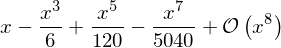

In [131]:
series( sin(x), x, 0, 8)

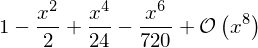

In [132]:
series( cos(x), x, 0, 8)

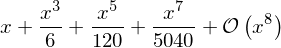

In [133]:
series( sinh(x), x, 0, 8)

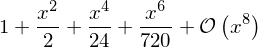

In [134]:
series( cosh(x), x, 0, 8)

Some functions are not defined at $x=0$, so we expand them at a different value of $x$.
For example, the power series of $\ln(x)$ expanded at $x=1$ is

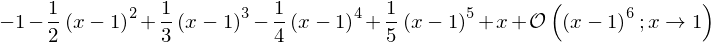

In [135]:
series(ln(x), x, 1, 6)  # Taylor series of ln(x) at x=1

Here, the result `SymPy` returns is misleading.
The Taylor series of $\ln(x)$ expanded at $x=1$ has terms of the form $(x-1)^n$:

$$
  \ln(x) = (x-1) - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \frac{(x-1)^5}{5} + \cdots.
$$

Verify this is the correct formula by substituting $x=1$.
`SymPy` returns an answer in terms of coordinates `relative` to $x=1$.

Instead of expanding $\ln(x)$ around $x=1$,
we can obtain an equivalent expression if we expand $\ln(x+1)$ around $x=0$:

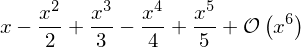

In [136]:
series(ln(x+1), x, 0, 6)  # Maclaurin series of ln(x+1)

## Vectors

A vector $\vec{v} \in \mathbb{R}^n$ is an $n$-tuple of real numbers. 
For example, consider a vector that has three components:  

$$
 \vec{v} = (v_1,v_2,v_3) \  \in \  (\mathbb{R},\mathbb{R},\mathbb{R}) \equiv \mathbb{R}^3.
$$

To specify the vector $\vec{v}$, 
we specify the values for its three components $v_1$, $v_2$, and $v_3$. 

A matrix $A \in \mathbb{R}^{m\times n}$ is a rectangular array of real numbers with $m$ rows and $n$ columns.
A vector is a special type of matrix; we can think of a vector $\vec{v}\in \mathbb{R}^n$
either as a row vector ($1\times n$ matrix) or a column vector ($n \times 1$ matrix).
Because of this equivalence between vectors and matrices,
there is no need for a special vector object in `SymPy`, 
and `Matrix` objects are used for vectors as well.

This is how we define vectors
and compute their properties:

In [137]:
u = Matrix([[4,5,6]])  # a row vector = 1x3 matrix
v = Matrix([[7],
            [8],       # a col vector = 3x1 matrix 
            [9]])

In [138]:
v.T                    # use the transpose operation to convert a col vec to a row vec

In [139]:
u[0]                   # 0-based indexing for entries

In [140]:
u.norm()               # length of u

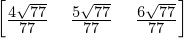

In [141]:
uhat = u/u.norm()      # unit-length vec in same dir as u
uhat

In [142]:
uhat.norm()

### Dot product

The dot product of the 3-vectors $\vec{u}$ and $\vec{v}$ can be defined two ways:

$$
  \vec{u}\cdot\vec{v}
  	\equiv 
	\underbrace{u_xv_x+u_yv_y+u_zv_z}_{\textrm{algebraic def.}} 
	\equiv 
	\underbrace{\|\vec{u}\|\|\vec{v}\|\cos(\varphi)}_{\textrm{geometric def.}} 
	\quad \in \mathbb{R},
$$

where $\varphi$ is the angle between the vectors $\vec{u}$ and $\vec{v}$.
In `SymPy`,

In [143]:
u = Matrix([ 4,5,6])
v = Matrix([-1,1,2])
u.dot(v)

We can combine the algebraic and geometric formulas for the dot product
to obtain the cosine of the angle between the vectors 

$$
    \cos(\varphi)
        = \frac{ \vec{u}\cdot\vec{v} }{  \|\vec{u}\|\|\vec{v}\| }
        = \frac{ u_xv_x+u_yv_y+u_zv_z  }{  \|\vec{u}\|\|\vec{v}\| },
$$

and use the `acos` function to find the angle measure:

In [144]:
acos(u.dot(v)/(u.norm()*v.norm())).evalf()  # in radians = 52.76 degrees

Just by looking at the coordinates of the vectors $\vec{u}$ and $\vec{v}$,
it's difficult to determine their relative direction. 
Thanks to the dot product, however,
we know the angle between the vectors is $52.76^\circ$,
which means they *kind of* point in the same direction.
Vectors that are at an angle $\varphi=90^\circ$ are called *orthogonal*, meaning at right angles with each other.
The dot product of vectors for which $\varphi > 90^\circ$ is negative because they point *mostly* in opposite directions.

The notion of the &ldquo;angle between vectors&rdquo; applies more generally to vectors with any number of dimensions.
The dot product for $n$-dimensional vectors is $\vec{u}\cdot\vec{v}=\sum_{i=1}^n u_iv_i$.
This means we can talk about &ldquo;the angle between&rdquo; 1000-dimensional vectors.
That's pretty crazy if you think about it&mdash;there is no way we could possibly &ldquo;visualize&rdquo; 1000-dimensional vectors,
yet given two such vectors we can tell if they point mostly in the same direction,
in perpendicular directions, or mostly in opposite directions. 

The dot product is a commutative operation $\vec{u}\cdot\vec{v} = \vec{v}\cdot\vec{u}$:

In [145]:
u.dot(v) == v.dot(u)

True

### Projections

Dot products are used for computing projections.
Assume you're given two vectors $\vec{u}$ and $\vec{n}$ and you want to find the component
of $\vec{u}$ that points in the $\vec{n}$ direction.
The following formula based on the dot product will give you the answer:

$$
 \Pi_{\vec{n}}( \vec{u} ) \equiv \frac{  \vec{u} \cdot \vec{n}  }{ \| \vec{n} \|^2 } \vec{n}.
$$

This is how to implement this formula in `SymPy`:

In [146]:
u = Matrix([4,5,6])
n = Matrix([1,1,1])
(u.dot(n) / n.norm()**2)*n  # projection of v in the n dir

In the case where the direction vector $\hat{n}$ is of unit length $\|\hat{n}\| = 1$,
the projection formula simplifies to $\Pi_{\hat{n}}( \vec{u} ) \equiv (\vec{u}\cdot\hat{n})\hat{n}$.

Consider now the plane $P$ defined by $(1,1,1)\cdot[(x,y,z)-(0,0,0)]=0$.
A plane is a two dimensional subspace of $\mathbb{R}^3$.
We can decompose any vector $\vec{u} \in \mathbb{R}^3$ into two parts $\vec{u}=\vec{v} + \vec{w}$
such that $\vec{v}$ lies inside the plane and $\vec{w}$ is perpendicular to the plane (parallel to $\vec{n}=(1,1,1)$).

To obtain the perpendicular-to-$P$ component of $\vec{u}$,
compute the projection of $\vec{u}$ in the direction $\vec{n}$:

In [147]:
w = (u.dot(n) / n.norm()**2)*n
w

To obtain the in-the-plane-$P$ component of $\vec{u}$,
start with $\vec{u}$ and subtract the perpendicular-to-$P$ part:

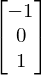

In [148]:
v = u - (u.dot(n)/n.norm()**2)*n  # same as u - w
v

You should check on your own that $\vec{v}+\vec{w}=\vec{u}$ as claimed.

### Cross product

The *cross product*, denoted $\times$, takes two vectors as inputs and produces a vector as output.
The cross products of individual basis elements are defined as follows:

$$
 \hat{\imath}\times\hat{\jmath} =\hat{k}, \qquad
 \hat{\jmath}\times\hat{k} =\hat{\imath}, \qquad
 \hat{k}\times \hat{\imath}= \hat{\jmath}.
$$

Here is how to compute the cross product of two vectors in `SymPy`:

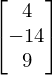

In [149]:
u = Matrix([ 4,5,6])
v = Matrix([-1,1,2])
u.cross(v)

The vector $\vec{u}\times \vec{v}$ is orthogonal to both $\vec{u}$ and $\vec{v}$.
The norm of the cross product  $\|\vec{u}\times \vec{v}\|$ is proportional to the lengths of the vectors 
and the sine of the angle between them:

In [150]:
(u.cross(v).norm()/(u.norm()*v.norm())).n()

The name &ldquo;cross product&rdquo; is well-suited for this operation since it is
calculated by &ldquo;cross-multiplying&rdquo; the coefficients of the vectors:

$$
   \vec{u}\times\vec{v}=
   \left( 
     u_yv_z-u_zv_y, \ u_zv_x-u_xv_z, \ u_xv_y-u_yv_x 
    \right).
$$

By defining individual symbols for the entries of two vectors,
we can make `SymPy` show us the cross-product formula:

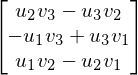

In [151]:
u1,u2,u3 = symbols('u1:4')
v1,v2,v3 = symbols('v1:4')
Matrix([u1,u2,u3]).cross(Matrix([v1,v2,v3]))

The dot product is anti-commutative $\vec{u}\times\vec{v} = -\vec{v}\times\vec{u}$:

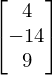

In [152]:
u.cross(v)

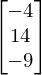

In [153]:
v.cross(u)

The product of two numbers and the dot product of two vectors are commutative operations.
The cross product, however, is not commutative: $\vec{u}\times\vec{v} \neq \vec{v}\times\vec{u}$.

## Mechanics

The module called [`sympy.physics.mechanics`](http://pyvideo.org/video/2653/dynamics-and-control-with-python) 
contains elaborate tools for describing mechanical systems,
manipulating reference frames, forces, and torques.
These specialized functions are not necessary for a first-year mechanics course.
The basic `SymPy` functions like `solve`,
and the vector operations you learned in the previous sections are powerful enough for basic Newtonian mechanics.

### Dynamics

The net force acting on an object is the sum of all the external forces acting on it $\vec{F}_{\textrm{net}} = \sum \vec{F}$.
Since forces are vectors, 
we need to use vector addition to compute the net force.

Compute
$\vec{F}_{\textrm{net}}=\vec{F}_1 + \vec{F}_2$,
where $\vec{F}_1=4\hat{\imath}[\mathrm{N}]$ and $\vec{F}_2 = 5\angle 30^\circ[\mathrm{N}]$:

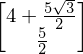

In [154]:
F_1 =  Matrix( [4,0] ) 
F_2 =  Matrix( [5*cos(30*pi/180), 5*sin(30*pi/180) ] )
F_net = F_1 + F_2
F_net                                    # in Newtons

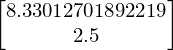

In [155]:
F_net.evalf()                            # in Newtons

To express the answer in length-and-direction notation,
use `norm` to find the length of $\vec{F}_{\textrm{net}}$
and `atan2` (The function `atan2(y,x)` computes the correct direction 
for all vectors $(x,y)$, unlike `atan(y/x)` which requires corrections for angles in the range $[\frac{\pi}{2}, \frac{3\pi}{2}]$.) to find its direction:

In [156]:
F_net.norm().evalf()                     # |F_net| in [N]

In [157]:
(atan2( F_net[1],F_net[0] )*180/pi).n()  # angle in degrees

The net force on the object is $\vec{F}_{\textrm{net}}= 8.697\angle 16.7^\circ$[N].

### Kinematics

Let $x(t)$ denote the position of an object,
$v(t)$ denote its velocity,
and $a(t)$ denote its acceleration.
Together $x(t)$, $v(t)$, and $a(t)$ are known as the *equations of motion* of the object.

The equations of motion are related by the derivative operation:

$$
  a(t) \overset{\frac{d}{dt} }{\longleftarrow} v(t) \overset{\frac{d}{dt} }{\longleftarrow} x(t).
$$

Assume we know the initial position $x_i\equiv x(0)$ and the initial velocity $v_i\equiv v(0)$ of the object 
and we want to find $x(t)$ for all later times.
We can do this starting from the dynamics of the problem&mdash;the forces acting on the object.

Newton's second law $\vec{F}_{\textrm{net}} = m\vec{a}$ states that a net force $\vec{F}_{\textrm{net}}$
applied on an object of mass $m$ produces acceleration $\vec{a}$.
Thus, we can obtain an objects acceleration if we know the net force acting on it.
Starting from the knowledge of $a(t)$, we can obtain $v(t)$ by integrating
then find $x(t)$ by integrating $v(t)$:

$$
a(t) \ \ \ \overset{v_i+ \int\!dt }{\longrightarrow} \ \ \ v(t) \ \ \ \overset{x_i+ \int\!dt }{\longrightarrow} \ \ \ x(t).
$$

The reasoning follows from the fundamental theorem of calculus:
if $a(t)$ represents the change in $v(t)$, 
then the total of $a(t)$ accumulated between $t=t_1$ and $t=t_2$
is equal to the total change in $v(t)$ between these times: $\Delta v = v(t_2) - v(t_1)$.
Similarly, the integral of $v(t)$ from $t=0$ until $t=\tau$ is equal to $x(\tau) - x(0)$.

### Uniform acceleration motion (UAM)

Let's analyze the case where the net force on the object is constant.
A constant force causes a constant acceleration $a = \frac{F}{m} = \textrm{constant}$.
If the acceleration function is constant over time $a(t)=a$.
We find $v(t)$ and $x(t)$ as follows:

In [158]:
t, a, v_i, x_i = symbols('t a v_i x_i')
v = v_i + integrate(a, (t, 0,t) )
v

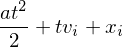

In [159]:
x = x_i + integrate(v, (t, 0,t) )
x

You may remember these equations from your high school physics class.
They are the *uniform accelerated motion* (UAM) equations:

\begin{align*}
 a(t) &= a,                                  \\ 
 v(t) &= v_i  + at,                          \\[-2mm] 
 x(t) &= x_i + v_it + \frac{1}{2}at^2.
\end{align*}

In high school, you probably had to memorize these equations.
Now you know how to derive them yourself starting from first principles.

For the sake of completeness, we'll now derive the fourth UAM equation,
which relates the object's final velocity to the initial velocity,
the displacement, and the acceleration, without reference to time:

In [160]:
(v*v).expand()

In [161]:
((v*v).expand() - 2*a*x).simplify()

The above calculation shows $v_f^2 - 2ax_f = -2ax_i + v_i^2$.
After moving the term $2ax_f$ to the other side of the equation, we obtain

\begin{align*}
 (v(t))^2 \ = \ v_f^2 =  v_i^2  + 2a\Delta x \ = \  v_i^2  + 2a(x_f-x_i).
\end{align*}

The fourth equation is important for practical purposes
because it allows us to solve physics problems in a time-less manner.

#### Example

Find the position function of an object at time $t=3[\mathrm{s}]$, 
if it starts from $x_i=20[\mathrm{m}]$ with $v_i=10[\mathrm{m/s}]$ and undergoes 
a constant acceleration of $a=5[\mathrm{m/s^2}]$.
What is the object's velocity at $t=3[\mathrm{s}]$?

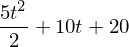

In [162]:
x_i = 20  # initial position
v_i = 10  # initial velocity
a   = 5   # acceleration (constant during motion)
x = x_i + integrate( v_i+integrate(a,(t,0,t)), (t,0,t) )   
x

In [163]:
x.subs({t:3}).n()          # x(3) in [m]

In [164]:
diff(x,t).subs({t:3}).n()  # v(3) in [m/s]

If you think about it,
physics knowledge combined with computer skills is like a superpower!

### General equations of motion

The procedure 
$a(t) \ \overset{v_i+ \int\!dt }{\longrightarrow} \ v(t) \ \overset{x_i+ \int\!dt }{\longrightarrow} \ x(t)$
can be used to obtain the position function $x(t)$ even when the acceleration is not constant.
Suppose the acceleration of an object is $a(t)=\sqrt{k t}$; 
what is its $x(t)$?

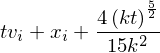

In [165]:
t, v_i, x_i, k = symbols('t v_i x_i k')
a = sqrt(k*t)
x = x_i + integrate( v_i+integrate(a,(t,0,t)), (t, 0,t) )
x

### Potential energy

Instead of working with the kinematic equations of motion $x(t)$, $v(t)$, and $a(t)$ which depend on time,
we can solve physics problems using *energy* calculations.
A key connection between the world of forces and the world of energy is the concept of *potential energy*.
If you move an object against a conservative force (think raising a ball in the air against the force of gravity),
you can think of the work you do agains the force as being stored in the potential energy of the object.

For each force $\vec{F}(x)$ there is a corresponding potential energy $U_F(x)$.
The change in potential energy associated with the force $\vec{F}(x)$ and displacement $\vec{d}$
is defined as the negative of the work done by the force during the displacement: $U_F(x) = - W = - \int_{\vec{d}} \vec{F}(x)\cdot d\vec{x}$.

The potential energies associated with gravity $\vec{F}_g = -mg\hat{\jmath}$
and the force of a spring $\vec{F}_s = -k\vec{x}$ are calculated as follows:

In [166]:
x, y = symbols('x y')
m, g, k, h = symbols('m g k h')
F_g = -m*g  # Force of gravity on mass m 
U_g = - integrate( F_g, (y,0,h) )
U_g         # Grav. potential energy

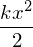

In [167]:
F_s = -k*x  # Spring force for displacement x 
U_s = - integrate( F_s, (x,0,x) )
U_s         # Spring potential energy

Note the negative sign in the formula defining the potential energy.
This negative is canceled by the negative sign of the dot product $\vec{F}\cdot d\vec{x}$:
when the force acts in the direction opposite to the displacement, 
the work done by the force is negative.

### Simple harmonic motion

The force exerted by a spring is given by the formula $F=-kx$.
If the only force acting on a mass $m$ is the force of a spring,
we can use Newton's second law to obtain the following equation:

$$
  F=ma  
  \quad \Rightarrow \quad
  -kx = ma   
  \quad \Rightarrow \quad
  -kx(t) = m\frac{d^2}{dt^2}\Big[x(t)\Big].
$$

The motion of a mass-spring system is described by the *differential equation* $\frac{d^2}{dt^2}x(t) + \omega^2 x(t)=0$,
where the constant $\omega = \sqrt{\frac{k}{m}}$ is called the angular frequency.
We can find the position function $x(t)$ using the `dsolve` method:

In [168]:
t = Symbol('t')                 # time t
x = Function('x')               # position function x(t)
w = Symbol('w', positive=True)  # angular frequency w
sol = dsolve( diff(x(t),t,t) + w**2*x(t), x(t) )
sol

In [169]:
x = sol.rhs           
x

Note the solution $x(t)=C_1\sin(\omega t)+C_2 \cos(\omega t)$ is equivalent to $x(t) = A\cos(\omega t + \phi)$, 
which is more commonly used to describe simple harmonic motion. 
We can use the `expand` function with the argument `trig=True` to convince ourselves of this equivalence:

In [170]:
A, phi = symbols("A phi")
(A*cos(w*t - phi)).expand(trig=True)

If we define $C_1=A\sin(\phi)$ and $C_2=A\cos(\phi)$, 
we obtain the form $x(t)=C_1\sin(\omega t)+C_2 \cos(\omega t)$ that `SymPy` found.

### Conservation of energy

We can verify that the total energy of the mass-spring system is conserved by showing 
$E_T(t) = U_s(t) + K(t) = \textrm{constant}$:

In [171]:
x = sol.rhs.subs({"C1":0,"C2":A}) 
x

In [172]:
v = diff(x, t)
v

In [173]:
E_T = (0.5*k*x**2 + 0.5*m*v**2).simplify()
E_T

In [174]:
E_T.subs({k:m*w**2}).simplify()     # = K_max

In [175]:
E_T.subs({w:sqrt(k/m)}).simplify()  # = U_max

## Linear algebra

A matrix $A \in \mathbb{R}^{m\times n}$ is a rectangular array of real numbers with $m$ rows and $n$ columns.
To specify a matrix $A$, we specify the values for its $mn$ components $a_{11}, a_{12}, \ldots, a_{mn}$
as a list of lists:

In [176]:
A = Matrix( [[ 2,-3,-8, 7],
             [-2,-1, 2,-7],
             [ 1, 0,-3, 6]] )

Use the square brackets to access the matrix elements or to obtain a submatrix:

In [177]:
A[0,1]         # row 0, col 1 of A

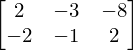

In [178]:
A[0:2,0:3]     # top-left 2x3 submatrix of A

Some commonly used matrices can be created with shortcut methods:

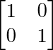

In [179]:
eye(2)         # 2x2 identity matrix

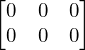

In [180]:
zeros(2, 3)

Standard algebraic operations like 
addition `+`, subtraction `-`, multiplication `*`,
and exponentiation `**` work as expected for `Matrix` objects.
The `transpose` operation flips the matrix through its diagonal:

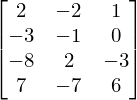

In [181]:
A.transpose()  # the same as A.T

Recall that the transpose is also used to convert row vectors into column vectors and vice versa.

### Row operations

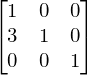

In [182]:
M = eye(3)
M.row_op(1, lambda v,j: v+3*M[0,j] )
M

The method `row_op` takes two arguments as inputs:
the first argument specifies the 0-based index of the row you want to act on,
while the second argument is a function of the form `f(val,j)`
that describes how you want the value `val=M[i,j]` to be transformed.
The above call to `row_op` implements the row operation $R_2 \gets R_2 + 3R_1$.

### Reduced row echelon form

The Gauss&mdash;Jordan elimination procedure is a sequence of row operations you can perform
on any matrix to bring it to its *reduced row echelon form* (RREF).
In `SymPy`, matrices have a `rref` method that computes their RREF:

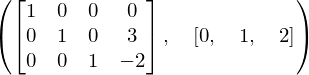

In [183]:
A = Matrix( [[2,-3,-8, 7],
             [-2,-1,2,-7],
             [1, 0,-3, 6]])
A.rref()  # RREF of A, location of pivots

Note the `rref` method returns a tuple of values:
the first value is the RREF of $A$,
while the second tells you the indices of the leading ones (also known as pivots) in the RREF of $A$.
To get just the RREF of $A$, select the $0^\mathrm{th}$ entry form the tuple: `A.rref()[0]`.

### Matrix fundamental spaces

Consider the matrix $A \in \mathbb{R}^{m\times n}$.
The fundamental spaces of a matrix are its column space $\mathcal{C}(A)$, 
its null space $\mathcal{N}(A)$,
and its row space $\mathcal{R}(A)$.
These vector spaces are important when you consider the matrix product
$A\vec{x}=\vec{y}$ as &ldquo;applying&rdquo; the linear transformation $T_A:\mathbb{R}^n \to \mathbb{R}^m$
to an input vector $\vec{x} \in \mathbb{R}^n$ to produce the output vector $\vec{y} \in \mathbb{R}^m$.

**Linear transformations** $T_A:\mathbb{R}^n \to \mathbb{R}^m$ (vector functions)
**are equivalent to $m\times n$ matrices**.
This is one of the fundamental ideas in linear algebra.
You can think of $T_A$ as the abstract description of the transformation 
and $A \in \mathbb{R}^{m\times n}$ as a concrete implementation of $T_A$.
By this equivalence, 
the fundamental spaces of a matrix $A$
tell us facts about the domain and image of the linear transformation $T_A$.
The columns space $\mathcal{C}(A)$ is the same as the image space space $\textrm{Im}(T_A)$ (the set of all possible outputs).
The null space $\mathcal{N}(A)$ is the same as the kernel $\textrm{Ker}(T_A)$ (the set of inputs that $T_A$ maps to the zero vector).
The row space $\mathcal{R}(A)$ is the orthogonal complement of the null space.
Input vectors in the row space of $A$ are in one-to-one correspondence with the output vectors in the column space of $A$.

Okay, enough theory! Let's see how to compute the fundamental spaces of the matrix $A$ defined above.
The non-zero rows in the reduced row echelon form of $A$ are a basis for its row space:

In [184]:
[ A.rref()[0][r,:] for r in A.rref()[1] ]  # R(A)

The column space of $A$ is the span of the columns of $A$ that contain the pivots
in the reduced row echelon form of $A$:

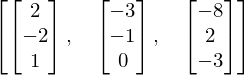

In [185]:
[ A[:,c] for c in  A.rref()[1] ]           # C(A)

Note we took columns from the original matrix $A$ and not its RREF.

To find the null space of $A$, call its `nullspace` method:

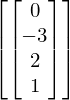

In [186]:
A.nullspace()                              # N(A)

### Determinants

The determinant of a matrix, 
denoted $\det(A)$ or $|A|$, 
is a particular way to multiply the entries of the matrix to produce a single number.

In [187]:
M = Matrix( [[1, 2, 3], 
             [2,-2, 4],
             [2, 2, 5]] )
M.det()

Determinants are used for all kinds of tasks:
to compute areas and volumes,
to solve systems of equations, 
and to check whether a matrix is invertible or not.

### Matrix inverse

For every invertible matrix $A$,
there exists an inverse matrix $A^{-1}$ which *undoes* the effect of $A$.
The cumulative effect of the product of $A$ and $A^{-1}$ (in any order)
is the identity matrix: $AA^{-1}= A^{-1}A=\mathbb{1}$.

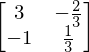

In [188]:
A = Matrix( [[1,2], 
             [3,9]] ) 
A.inv()

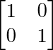

In [189]:
A.inv()*A

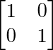

In [190]:
A*A.inv()

The matrix inverse $A^{-1}$ plays the role of division by $A$.

### Eigenvectors and eigenvalues

When a matrix is multiplied by one of its eigenvectors the output
is the same eigenvector multiplied by a constant $A\vec{e}_\lambda =\lambda\vec{e}_\lambda$.
The constant $\lambda$ (the Greek letter *lambda*) is called an *eigenvalue* of $A$.

To find the eigenvalues of a matrix, start from the definition $A\vec{e}_\lambda =\lambda\vec{e}_\lambda$,
insert the identity $\mathbb{1}$, 
and rewrite it as a null-space problem:

$$
A\vec{e}_\lambda =\lambda\mathbb{1}\vec{e}_\lambda
\qquad
\Rightarrow
\qquad
\left(A - \lambda\mathbb{1}\right)\vec{e}_\lambda = \vec{0}.
$$

This equation will have a solution whenever $|A - \lambda\mathbb{1}|=0$.(The invertible matrix theorem states
that a matrix has a non-empty null space if and only if its determinant is zero.)
The eigenvalues of $A \in \mathbb{R}^{n \times n}$, 
denoted $\{ \lambda_1, \lambda_2, \ldots, \lambda_n \}$,\
are the roots of the *characteristic polynomial* $p(\lambda)=|A - \lambda \mathbb{1}|$.

In [191]:
A = Matrix( [[ 9, -2],
             [-2,  6]] )
A.eigenvals()  # same as solve(det(A-eye(2)*x), x)
               # return eigenvalues with their multiplicity

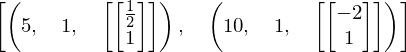

In [192]:
A.eigenvects()

Certain matrices can be written entirely in terms of their eigenvectors and their eigenvalues.
Consider the matrix $\Lambda$ (capital Greek *L*) that has the eigenvalues of the matrix $A$ on the diagonal, 
and the matrix $Q$ constructed from the eigenvectors of $A$ as columns:

$$
\Lambda = 
\begin{bmatrix}
\lambda_1	&  \cdots  &  0 \\
\vdots 	&  \ddots  &  0  \\
0  	&   0      &  \lambda_n
\end{bmatrix}\!,
\ \ 
Q \: = 
\begin{bmatrix}
|  &  & | \\
\vec{e}_{\lambda_1}  & \!  \cdots \! &  \large\vec{e}_{\lambda_n} \\
|  &  & | 
\end{bmatrix}\!,
\ \ 
\textrm{then}
\ \ 
A = Q \Lambda Q^{-1}.
$$

Matrices that can be written this way are called *diagonalizable*.
To *diagonalize* a matrix $A$ is to find its $Q$ and $\Lambda$ matrices:

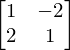

In [193]:
Q, L = A.diagonalize()
Q            # the matrix of eigenvectors as columns 

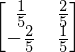

In [194]:
Q.inv()

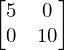

In [195]:
L            # the matrix of eigenvalues

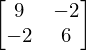

In [196]:
Q*L*Q.inv()  # eigendecomposition of A

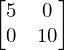

In [197]:
Q.inv()*A*Q  # obtain L from A and Q

Not all matrices are diagonalizable.
You can check if a matrix is diagonalizable by calling its `is_diagonalizable` method:

In [198]:
A.is_diagonalizable()

True

In [199]:
B = Matrix( [[1, 3],
            [0, 1]] )
B.is_diagonalizable()

False

In [200]:
B.eigenvals()  # eigenvalue 1 with multiplicity 2

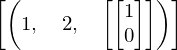

In [201]:
B.eigenvects()

The matrix $B$ is not diagonalizable because it doesn't have a full set of eigenvectors.
To diagonalize a $2\times 2$ matrix, we need two orthogonal eigenvectors but $B$ has only a single eigenvector.
Therefore, we can't construct the matrix of eigenvectors $Q$ (we're missing a column!) 
and so $B$ is not diagonalizable.

Non-square matrices don't have eigenvectors and therefore don't have an eigendecomposition.
Instead, we can use the *singular value decomposition* to break up a non-square matrix $A$ into 
left singular vectors,
right singular vectors, 
and a diagonal matrix of singular values.
Use the `singular_values` method on any matrix to find its singular values.

## Conclusion

I would like to conclude with some words of caution about the overuse of computers.
Computer technology is very powerful and is everywhere around us,
but let's not forget that computers are actually very dumb:
computers are mere calculators and they depend on your knowledge to direct them.
It's important that you learn how to do complicated math by hand in order to be 
able to instruct computers to do math for you and to check the results of your computer calculations.
I don't want you to use the tricks you learned in this tutorial to avoid math problems from now on
and simply rely blindly on `SymPy` for all your math needs.
I want both you and the computer to become math powerhouses!
The computer will help you with tedious calculations (they're good at that)
and you'll help the computer by guiding it when it gets  stuck (humans are good at that).

## Links

* [Installation instructions for `ipython notebook`](http://ipython.org/install.html)
* [The official `SymPy` tutorial](http://docs.sympy.org/latest/tutorial/intro.html)
* [A list of `SymPy` gotchas](http://docs.sympy.org/dev/gotchas.html)
* [`SymPy` video tutorials by Matthew Rocklin](http://pyvideo.org/speaker/583/matthew-rocklin)

## Book plug

![Cover](http://minireference.com/miniref/lib/tpl/miniref/dist/images/productshots/noBSguide_math_physics_softcover.png)

The examples and math explanations in this tutorial are sourced from the 
*No bullshit guide* series of books published by Minireference&nbsp;Co.
We publish textbooks that make math and physics accessible and affordable for everyone.
If you're interested in learning more about the math, physics, and calculus topics discussed in this tutorial,
check out the **No bullshit guide to math and physics**.
The book contains the distilled information that normally comes in two first-year university books:
the introductory physics book (1000+ pages) and the first-year calculus book (1000+ pages).
Would you believe me if I told you that you can learn the 
same material from a single book that is 1/7<sup>th</sup> the size and 1/10<sup>th</sup> of the 
price of mainstream textbooks?

This book contains short lessons on math and physics, calculus.
Often calculus and mechanics are taught as separate subjects.
It shouldn't be like that.
If you learn calculus without mechanics, it will be boring.
If you learn mechanics without calculus, you won't truly understand what is going on.
This textbook covers both subjects in an integrated manner.
    
Contents:

* High school math
* Vectors
* Mechanics
* Differential calculus
* Integral calculus
* 250+ practice problems

For more information, see the book's website at [minireference.com](http://minireference.com/)

The presented linear algebra examples are 
sourced from the [**No bullshit guide to linear algebra**](https://gum.co/noBSLA).
Check out the book if you're taking a linear algebra course of if you're missing the prerequisites 
for learning machine learning, computer graphics, or quantum mechanics.

I'll close on a note for potential readers who suffer from math-phobia.
Both books start with an introductory chapter that reviews all 
high school math concepts needed to make math and physics 
accessible to everyone.
Don't worry, we'll fix this math-phobia thing right up for you;
**when you've got `SymPy` skills, math fears *you*!**

To stay informed about upcoming titles,
follow [@minireference](https://twitter.com/minireference) on twitter 
and check out the facebook page at [fb.me/noBSguide](http://fb.me/noBSguide).